## Imports

- kNN.ipynb contains the kNN class
- preprocess.ipynb contains helper functions to preprocess data
- sim_metrics.ipynb contains the similarity metrics

In [1]:
# imports
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt

%run kNN.ipynb
%run preprocess.ipynb
%run sim_metrics.ipynb

We define our preprocessing class and set a random seed to ensure reproducability.

In [2]:
p = Preprocess(is_neural=False)

seed = 7
np.random.seed(7)

## Load MNIST Data

In [3]:
train_file = "mnist_train.csv"
test_file = "mnist_test.csv"

In [4]:
#load the mnist training data CSV file into a list
#train_data_file = open("mnist/mnist_train_100.csv", 'r') # open and read the 100 instances in the text file
train_data_file = open(train_file, 'r')
train_data_list = train_data_file.readlines() # read all lines into memory 
train_data_file.close() 
print("train set size: ", len(train_data_list))

#testing the network
#load the mnist test data CSV file into a list
test_data_file = open(test_file, 'r') # read the file 
test_data_list = test_data_file.readlines()
test_data_file.close()
print("test set size: ", len(test_data_list))

train set size:  60000
test set size:  10000


In [5]:
mini_training_data = p.generate_mini_data(
    data=train_data_list, 
    amount=1500)

X_train, y_train = p.preprocess_data(mini_training_data)
X_test, y_test = p.preprocess_data(test_data_list)

print(len(X_train))
print(len(X_test))

1500
10000


## Assess the impact on performance using different similarity/distance metrics

To demonstrate the difference in similarity & distance metrics, we reduce the testing data to 500 samples.

In [6]:
mini_testing_data = p.generate_mini_data(test_data_list, amount=500)
mini_test_X, mini_test_y = p.preprocess_data(mini_testing_data)

sim_metrics = [euclidean, manhattan, cosine_similarity, dot_product]

sim_metric_results = []
testing_times = []

for metric in sim_metrics:
    knn = kNN(X_train, y_train, sim=metric)
    
    start_time = time.time()
    knn.test(mini_test_X, mini_test_y)
    test_time = time.time() - start_time
    
    testing_times.append(int(round(test_time)))
    
    sim_metric_results.append(knn.evaluate(knn.results))
    
print(sim_metric_results)

Testing...
Iteration# 200
Iteration# 400
Testing complete!
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Testing...
Iteration# 200
Iteration# 400
Testing complete!
Testing...
Iteration# 200
Iteration# 400
Testing complete!
[91.2, 89.60000000000001, 90.2, 67.0]


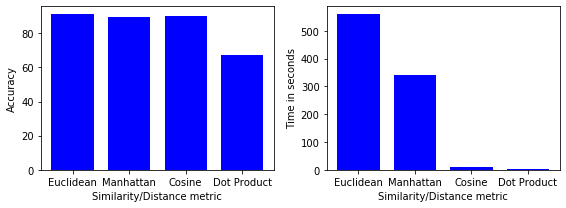

In [7]:
sim_metrics = ['Euclidean', 'Manhattan', 'Cosine', 'Dot Product']
width = 0.75

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

ax1.bar(sim_metrics, sim_metric_results, width, color='blue')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Similarity/Distance metric')

ax2.bar(sim_metrics, testing_times, width, color='blue')
ax2.set_ylabel('Time in seconds')
ax2.set_xlabel('Similarity/Distance metric')

fig.tight_layout()

#plt.savefig('euclidean-vs-cosine.png', dpi=300)

plt.show()

We see that the difference in accuracy between euclidean and cosine is so small, therfore, we decide to use cosine similarity for all other kNN related tasks as the time it takes to test outweights the minor increase in accuracy from using euclidean.

## Apply kNN on testing data

We record the time it takes to test in order to get an estimate on how long it would take to test kNN on the entire testing set. 

In [8]:
knn = kNN(X_train, y_train, sim=cosine_similarity)

start_time = time.time()
knn.test(X_test, y_test)
print('--- Training time in seconds: %s ---' % (time.time() - start_time))

accuracy = knn.evaluate(knn.results)

print("kNN Accuracy on test set is: ", accuracy)

Testing...
Iteration# 200
Iteration# 400
Iteration# 600
Iteration# 800
Iteration# 1000
Iteration# 1200
Iteration# 1400
Iteration# 1600
Iteration# 1800
Iteration# 2000
Iteration# 2200
Iteration# 2400
Iteration# 2600
Iteration# 2800
Iteration# 3000
Iteration# 3200
Iteration# 3400
Iteration# 3600
Iteration# 3800
Iteration# 4000
Iteration# 4200
Iteration# 4400
Iteration# 4600
Iteration# 4800
Iteration# 5000
Iteration# 5200
Iteration# 5400
Iteration# 5600
Iteration# 5800
Iteration# 6000
Iteration# 6200
Iteration# 6400
Iteration# 6600
Iteration# 6800
Iteration# 7000
Iteration# 7200
Iteration# 7400
Iteration# 7600
Iteration# 7800
Iteration# 8000
Iteration# 8200
Iteration# 8400
Iteration# 8600
Iteration# 8800
Iteration# 9000
Iteration# 9200
Iteration# 9400
Iteration# 9600
Iteration# 9800
Iteration# 10000
Testing complete!
--- Training time in seconds: 198.32566499710083 ---
kNN Accuracy on test set is:  91.43


## Testing the impact of increasing "k" with weighted and unweighted voting on kNN accuracy

Here we assess the impact of increasing the hyperparameter "k" for both weighted and unweighted voting on the accuracy of kNN. We use the euclidean distance as our similarity metric.

In [7]:
print("Setup the kNN instances ...")
knn_list = []
ks = [1, 3, 21, 51, 81]
is_weighted = [False, True]

# iterate over different voting strategies
for weighted in is_weighted:
    knn_list_element = [] # first set of knns with a specified voting scheme
    #iterate over different k values
    for k in ks:
        #create the different instances of the kNN class
        knn = kNN(X_train, y_train, k, cosine_similarity, weighted)
        
        knn_list_element.append(knn)
        pass
    
    knn_list.append(knn_list_element)# now append the set of models 
    pass


#lets test the kNNs 
#iterate through each model and accumilate number of correct predictions
knn_results = []
knn_result_element = []

for knn1 in knn_list:
    knn_result_element = []

    for knn2 in knn1:
        knn2.test(X_test, y_test)
             
        knn_result_element.append(knn2.evaluate(knn2.results))
        
        pass
    pass
    knn_results.append(knn_result_element)
    pass
print("Results from trials...", knn_results)

Setup the kNN instances ...
Testing...
Iteration# 200
Iteration# 400
Iteration# 600
Iteration# 800
Iteration# 1000
Iteration# 1200
Iteration# 1400
Iteration# 1600
Iteration# 1800
Iteration# 2000
Iteration# 2200
Iteration# 2400
Iteration# 2600
Iteration# 2800
Iteration# 3000
Iteration# 3200
Iteration# 3400
Iteration# 3600
Iteration# 3800
Iteration# 4000
Iteration# 4200
Iteration# 4400
Iteration# 4600
Iteration# 4800
Iteration# 5000
Iteration# 5200
Iteration# 5400
Iteration# 5600
Iteration# 5800
Iteration# 6000
Iteration# 6200
Iteration# 6400
Iteration# 6600
Iteration# 6800
Iteration# 7000
Iteration# 7200
Iteration# 7400
Iteration# 7600
Iteration# 7800
Iteration# 8000
Iteration# 8200
Iteration# 8400
Iteration# 8600
Iteration# 8800
Iteration# 9000
Iteration# 9200
Iteration# 9400
Iteration# 9600
Iteration# 9800
Iteration# 10000
Testing complete!
Testing...
Iteration# 200
Iteration# 400
Iteration# 600
Iteration# 800
Iteration# 1000
Iteration# 1200
Iteration# 1400
Iteration# 1600
Iteration# 

Iteration# 9400
Iteration# 9600
Iteration# 9800
Iteration# 10000
Testing complete!
Results from trials... [[91.3, 91.43, 89.77000000000001, 86.55000000000001, 84.09], [91.3, 91.93, 90.22, 87.06, 84.81]]


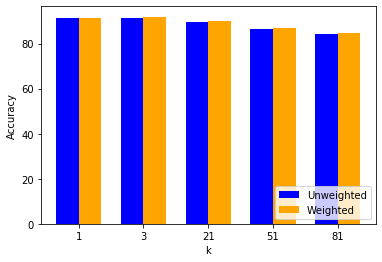

In [9]:
N = len(ks) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

performance1 = knn_results[0]
performance2 = knn_results[1]

width = 0.35 # width of the bar      
plt.bar(ind, performance1, width, label='Unweighted', color='blue')
plt.bar(ind + width, performance2, width, label='Weighted', color='orange')

plt.ylabel('Accuracy')
plt.xlabel('k')

plt.xticks(ind + width / 2, ks)
plt.legend(loc='lower right')

#plt.savefig('increasing-k.png', dpi=300)
plt.show()